# **Pickle**

Модуль pickle предназначен для удобной сериализации и десериализации объектов Python. 

**Сериализация** - процесс преобразования объекта Python в поток байтов.

**Десериализация** - обратная операция, в результате которой поток байтов преобразуется обратно в Python-объект.

[Ссылка на официальную документацию](https://docs.python.org/3/library/pickle.html)

## Основные методы



Модуль pickle предоставляет следующие функции для удобства сохранения/загрузки объектов:

In [ ]:
import pickle

testData = {
    'a': [1, 2.0, 3, (4+6j)], 
    'b': ('character string', b'byte string'), 
    'c': {None, True, False}
}

1) **dump** - записывает сериализованный объект в файл. 

In [ ]:
with open('data.pickle', 'wb') as f:
    pickle.dump(testData, f)

2) **load** - загружает объект из файла.

In [ ]:
with open('data.pickle', 'rb') as f:
    data_new = pickle.load(f)

print(data_new)

{'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {None, True, False}}


3) **dumps** - возвращает сериализованный объект.

In [ ]:
binaryData = pickle.dumps(testData)
print(binaryData)

b'\x80\x03}q\x00(X\x01\x00\x00\x00aq\x01]q\x02(K\x01G@\x00\x00\x00\x00\x00\x00\x00K\x03cbuiltins\ncomplex\nq\x03G@\x10\x00\x00\x00\x00\x00\x00G@\x18\x00\x00\x00\x00\x00\x00\x86q\x04Rq\x05eX\x01\x00\x00\x00bq\x06X\x10\x00\x00\x00character stringq\x07C\x0bbyte stringq\x08\x86q\tX\x01\x00\x00\x00cq\ncbuiltins\nset\nq\x0b]q\x0c(N\x88\x89e\x85q\rRq\x0eu.'


4) **loads** - загружает объект из потока байт.

In [ ]:
originalData = pickle.loads(binaryData)
print(originalData)

{'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {None, True, False}}


Pickle работает не только со встроенными типами python, но также с *пользовательскими типами*

## Задание

Создайте свой класс и с помощью **pickle** запишите его в файл под название "MyClassInFile"


# **Shelve**

Shelve позволяет работать с файлом, как со словарем

Он сохраняет объекты в файл с определенным ключом. Затем по этому ключу может извлечь ранее сохраненный объект из файла.

[Ссылка на официальную документацию](https://docs.python.org/3/library/shelve.html)

In [ ]:
import shelve
 
with shelve.open("states") as states:
    states["London"] = "Great Britain"
    states["Paris"] = "France"
    states["Berlin"] = "Germany"
    states["Madrid"] = "Spain"
 
with shelve.open("states") as states:
    print(states["London"])
    print(states["Madrid"])

Great Britain
Spain


## Получение данных

Для получения данных можно использовать метод **get()**. Первый параметр метода - ключ, по которому следует получить значение, а второй - значение по умолчанию, которое возвращается, если ключ не найден.

In [ ]:
with shelve.open("states") as states:
    state = states.get("Brussels", "Undefined")
    print(state)

Belgium


Используя цикл for, можно перебрать все значения из файла:

In [ ]:
with shelve.open("states") as states:
    for key in states:
        print(key," - ", states[key])

Berlin  -  Germany
London  -  United Kingdom
Brussels  -  Belgium
Paris  -  France


Метод **keys()** возвращает все ключи из файла, а метод **values()** - все значения

In [ ]:
with shelve.open("states") as states: 
    for city in states.keys():
        print(city, end=" ")
    print()
    for country in states.values():
        print(country, end=" ")

Berlin London Brussels Paris 
Germany United Kingdom Belgium France 

Еще один метод **items()** возвращает набор кортежей. Каждый кортеж содержит ключ и значение

In [ ]:
with shelve.open("states") as states: 
    for state in states.items():
        print(state)

('Berlin', 'Germany')
('London', 'United Kingdom')
('Brussels', 'Belgium')
('Paris', 'France')


## Обновление данных

Для изменения данных достаточно присвоить по ключу новое значение, а для добавления данных - определить новый ключ

In [ ]:
with shelve.open("states") as states:
    states["London"] = "United Kingdom"
    states["Brussels"] = "Belgium"
    
    for key in states:
        print(key, " - ", states[key])

Berlin  -  Germany
London  -  United Kingdom
Brussels  -  Belgium
Paris  -  France


## Удаление данных

Для удаления с одновременным получением можно использовать функцию **pop**, в которую передается ключ элемента и значение по умолчанию, если ключ не найден

In [ ]:
with shelve.open("states") as states:
    state = states.pop("London", "NotFound")
    print(state)

United Kingdom


Также для удаления может применяться оператор **del**

In [ ]:
with shelve.open("states") as states:
    del states["Madrid"]  

Для удаления всех элементов можно использовать метод **clear**

In [ ]:
with shelve.open(FILENAME) as states:
    states.clear()

## Задание

С помощью **shelve** создайте файл "MyFavoriteMovies", и запишите в него названия своих любимых фильмов. В качестве ключей используйте имена режисеров

# **Sqlite3**

Sqlite3 - это модуль, позволяющий использовать базу данных на диске, без подключения к серверу

[Ссылка на официальную документацию](https://docs.python.org/2/library/sqlite3.html)

## Создание базы данных

Сначала с помощью функции **connect(name)** создадим связь с базой данных, в переменную **name** можно передать название файла или специальную строку **“:memory:”** для создания базы данных в памяти.

In [ ]:
import sqlite3
 
conn = sqlite3.connect("mydatabase.db") # или :memory: чтобы сохранить в RAM

Далее мы создаем объект **cursor**, который позволяет нам взаимодействовать с базой данных и добавлять записи

In [ ]:
cursor = conn.cursor()

С помощью метода **execute** мы можем выполнять любые *sql-команды* на нашей базе данных. Здесь мы создаем таблицу под названием albums с тремя следующими полями: title, artist, release_date. 

SQLite поддерживает только пять типов данных: **null, integer, real, text и blob**. 

In [ ]:
cursor.execute("CREATE TABLE albums (title text, artist text, release_date text)")

Если запустить команду **CREATE TABLE**, и при этом база данных уже существует, вы получите сообщение об ошибке.

In [ ]:
cursor.execute("CREATE TABLE albums (title text, artist text, release_date text)")

OperationalError: ignored

## Вставка данных

Используем команду **INSERT INTO** чтобы вставить запись в нашу базу данных. Обратите внимание на то, что каждый объект находится в *одинарных кавычках*.

In [ ]:
cursor.execute("INSERT INTO albums VALUES ('Glow', 'Andy Hunter', '7/24/2012')")

Метод **commit** сохраняет внесенные изменения в базу данных

In [ ]:
conn.commit()

Метод **executemany** позволяет добавить сразу несколько записей

In [ ]:
albums = [('Exodus', 'Andy Hunter', '7/9/2002'),
          ('Until We Have Faces', 'Red', '2/1/2011'),
          ('The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012'),
          ('The Good Life', 'Trip Lee', '4/10/2012')]

cursor.executemany("INSERT INTO albums VALUES (?,?,?)", albums)
conn.commit()

## Обновление и удаление данных

Таким же образом можно легко *обновлять и удалять* данные.

In [ ]:
sql = """
UPDATE albums 
SET artist = 'John Doe' 
WHERE artist = 'Andy Hunter'
"""
 
cursor.execute(sql)
conn.commit()

In [ ]:
sql = "DELETE FROM albums WHERE artist = 'John Doe'"
 
cursor.execute(sql)
conn.commit()

## Получение данных из таблицы

Чтобы *получить* данные из таблицы, необходимо сначала исполнить соответствующую sql-команду, затем данные можно получить с помощью одного из трех методов: **fetchone**, **fetchmany**, **fetchall**

In [ ]:
sql = "SELECT rowid, * FROM albums ORDER BY artist"
cursor.execute(sql)

In [ ]:
cursor.fetchone()

(3, 'Until We Have Faces', 'Red', '2/1/2011')

In [ ]:
cursor.fetchone()

(4, 'The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012')

In [ ]:
cursor.fetchone()

(5, 'The Good Life', 'Trip Lee', '4/10/2012')

In [ ]:
cursor.fetchmany(2)

[(3, 'Until We Have Faces', 'Red', '2/1/2011'),
 (4, 'The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012')]

In [ ]:
cursor.fetchall()

[(3, 'Until We Have Faces', 'Red', '2/1/2011'),
 (4, 'The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012'),
 (5, 'The Good Life', 'Trip Lee', '4/10/2012')]

Метод **execute** при отборе данных из таблицы возвращает итератор

In [ ]:
for row in cursor.execute("SELECT rowid, * FROM albums ORDER BY artist"):
    print(row)

(3, 'Until We Have Faces', 'Red', '2/1/2011')
(4, 'The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012')
(5, 'The Good Life', 'Trip Lee', '4/10/2012')


In [ ]:
list(cursor.execute("SELECT rowid, * FROM albums ORDER BY artist"))

[(3, 'Until We Have Faces', 'Red', '2/1/2011'),
 (4, 'The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012'),
 (5, 'The Good Life', 'Trip Lee', '4/10/2012')]

## Объекты Row

Создадим еще одну базу данных, только присвоим атрибуту **row_factory** значение **sqlite3.Row**

In [ ]:
import sqlite3

conn = sqlite3.connect("mydatabase2.db")

conn.row_factory = sqlite3.Row

cursor = conn.cursor()
cursor.execute("CREATE TABLE albums (title text, artist text, release_date text)")

Заполним таблицу некоторыми данными

In [ ]:
albums = [('Exodus', 'Andy Hunter', '7/9/2002'),
          ('Until We Have Faces', 'Red', '2/1/2011'),
          ('The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012'),
          ('The Good Life', 'Trip Lee', '4/10/2012')]

cursor.executemany("INSERT INTO albums VALUES (?,?,?)", albums)
conn.commit()

Теперь метод **execute** возвращает при отборе данных объекты **Row**

In [ ]:
rows = list(cursor.execute("SELECT rowid, * FROM albums ORDER BY artist"))
rows

Они подобны словарям Python и дают вам доступ к полям строк точь в точь, как и словарь

In [ ]:
rows[0]['title']

'Exodus'

## Задание

Создайте таблицу employees и заполните ее данными, как на картинке. Повысьте зарплату на 1000 долларов всем работикам младше 30 лет и удалите из таблицы работников старше 40

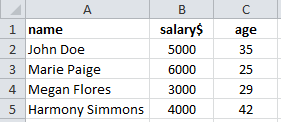